## Installing and Importing Necessary Modules

In [1]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install qiskit-aer
!pip install qiskit-experiments

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 38.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 32.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 29.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.3/343.3 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.18
    Uninstalling urllib3-1.26.18:
      Successfully uninstalled urllib3-1.26.18
ERROR: pip's de

In [2]:
from numpy import *
from matplotlib.pyplot import *
from scipy.ndimage import gaussian_filter1d

# Importing standard Qiskit libraries
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer, noise, AerSimulator
from qiskit_aer.noise import depolarizing_error, NoiseModel
from qiskit.quantum_info import state_fidelity, Statevector, DensityMatrix, partial_trace
from qiskit_experiments.library import StateTomography
from qiskit_experiments.framework import ExperimentData

# from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit_ibm_runtime import QiskitRuntimeService

# Loading your IBM Quantum account(s)
provider = QiskitRuntimeService(channel="ibm_quantum", token="786ab83c1f9b5535280b9414b2ba912efd79cf4264ccabab0982b47ca2fa4a9460f8994e175a00654be48b678cdbbb65d5a7276a8a0e36edbc761fcf22016aa6")

qiskit_runtime_service.__init__:INFO:2024-10-06 20:09:24,743: Default instance: ibm-q/open/main


## Creating Sample Circuit

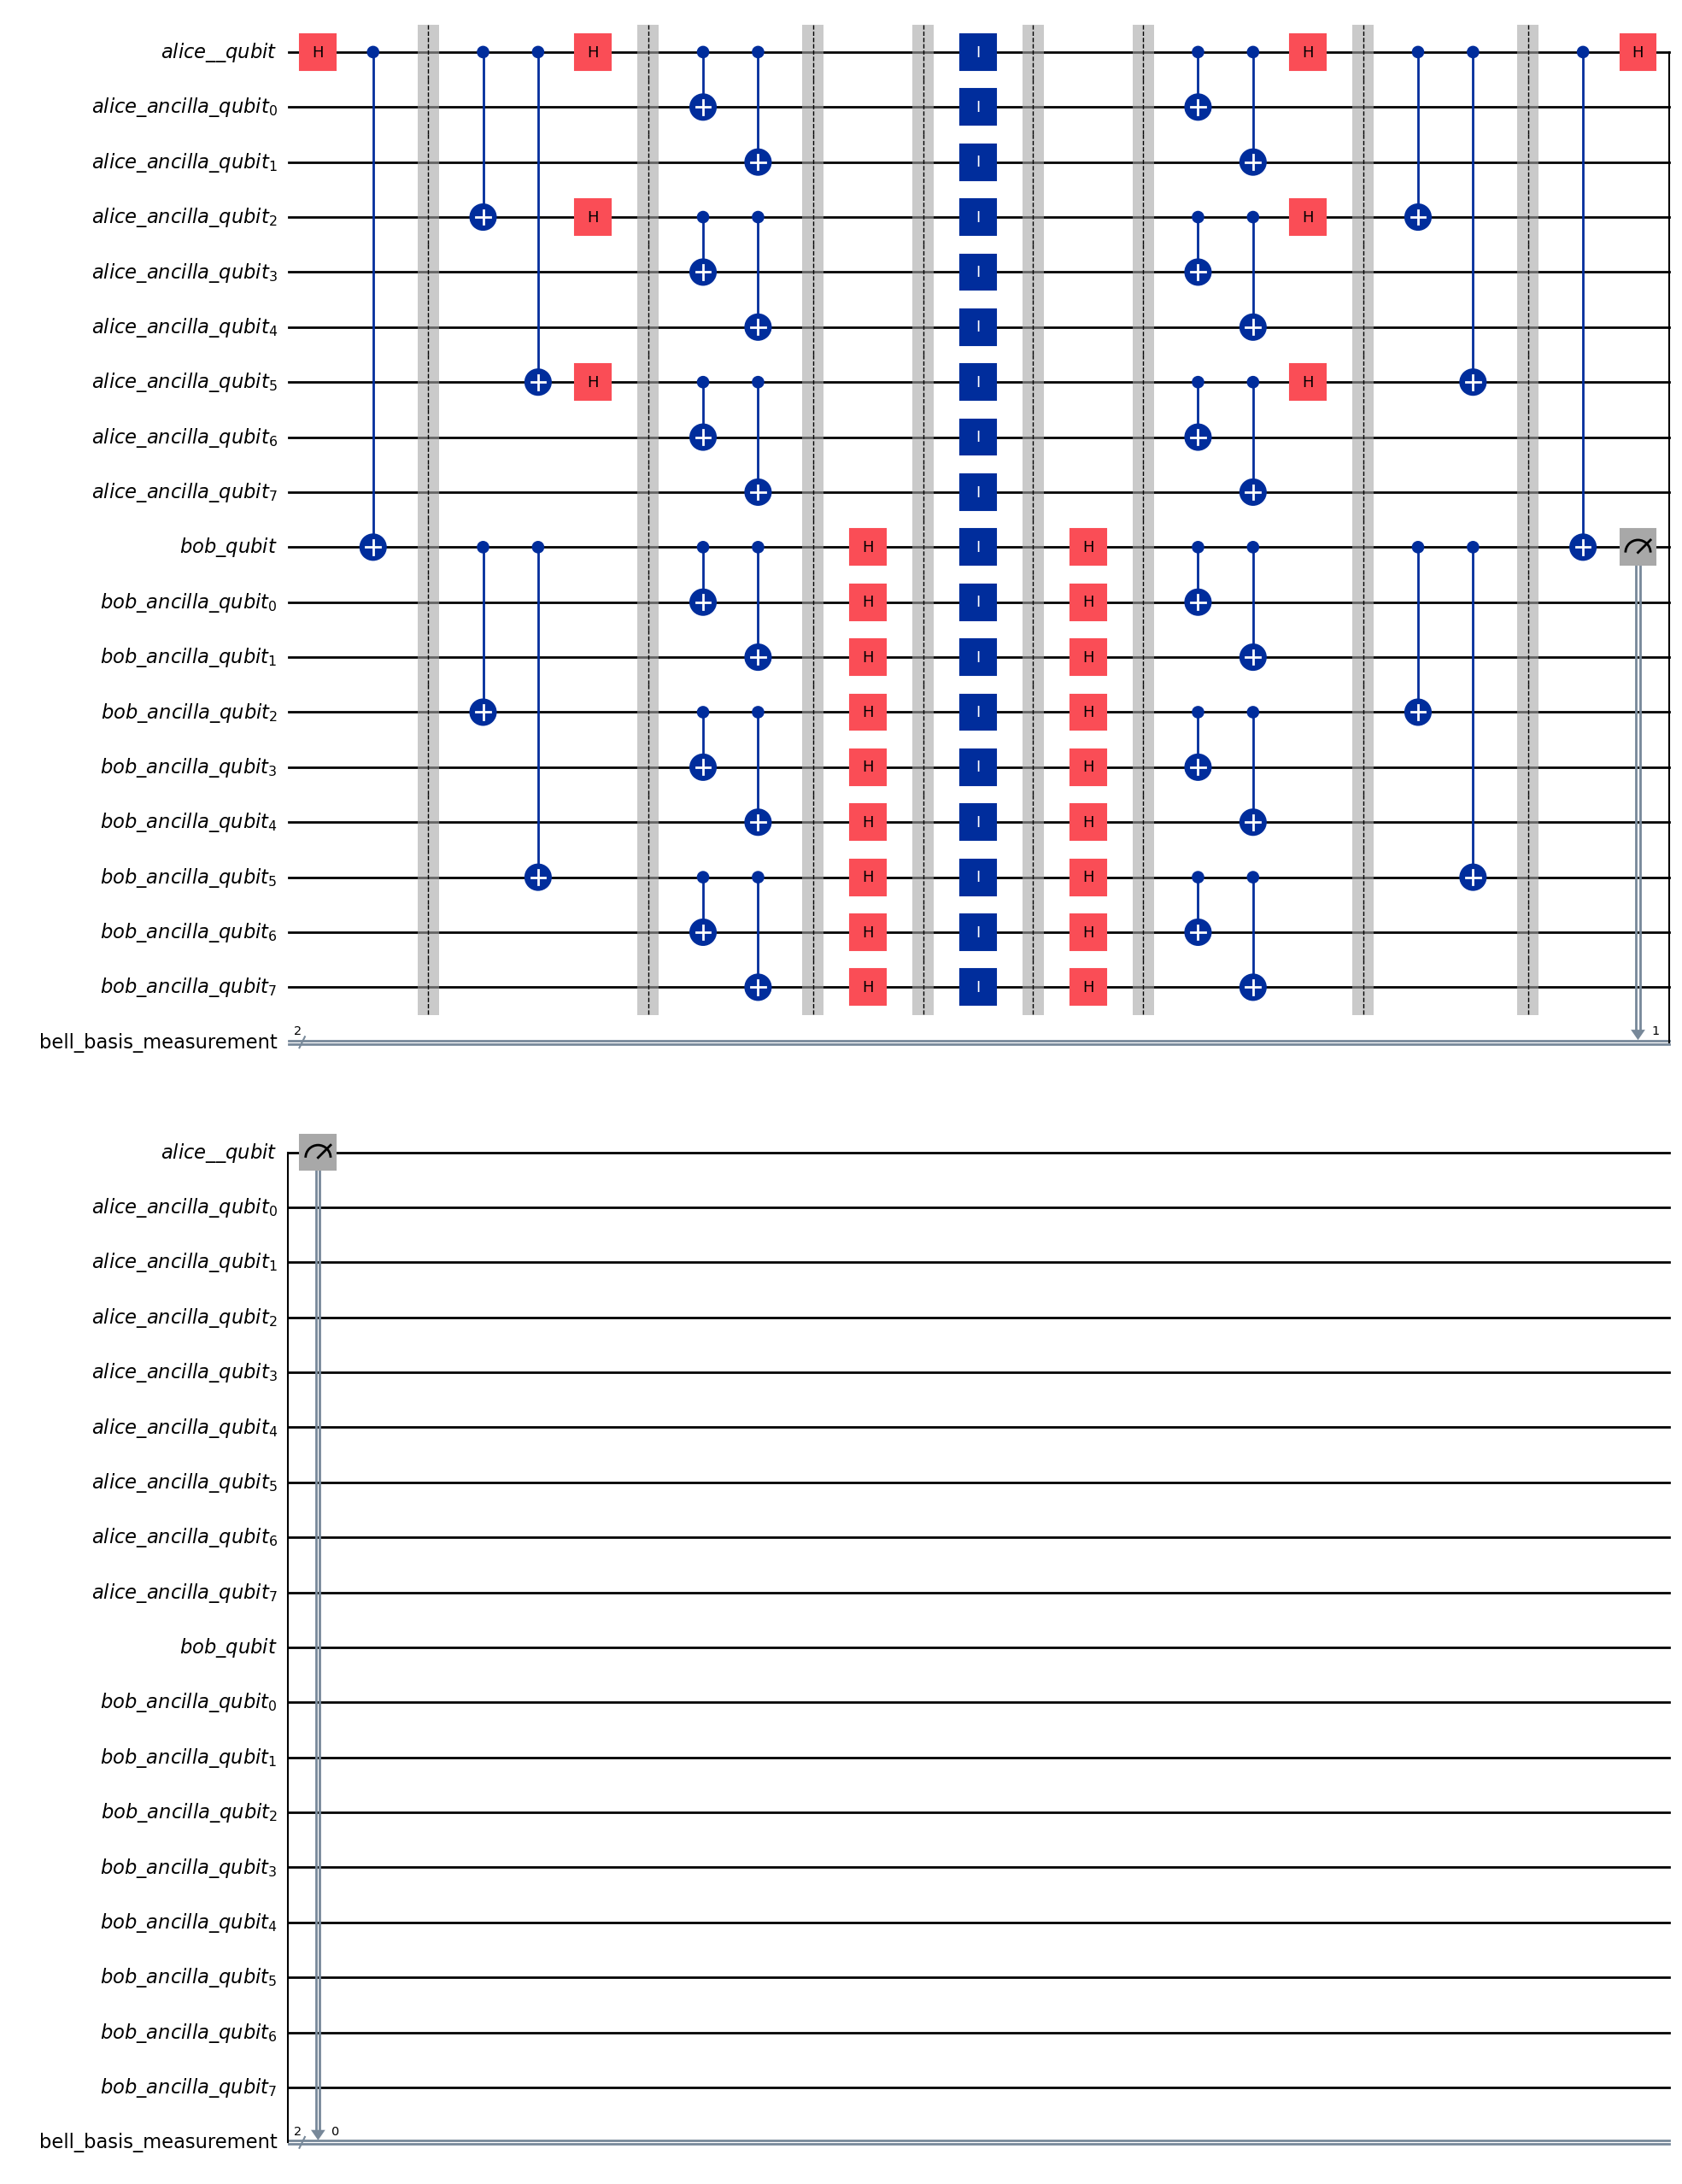

In [3]:
# 9 bit Shor with phase-bit flip interchanged on a bell state

cr = ClassicalRegister(2,"bell_basis_measurement")
alice = QuantumRegister(1, 'alice__qubit')
aq1 = QuantumRegister(8, 'alice_ancilla_qubit')
bob = QuantumRegister(1, 'bob_qubit')
aq2 = QuantumRegister(8, 'bob_ancilla_qubit')

shor9 = QuantumCircuit(alice,aq1,bob,aq2,cr)

shor9.h(0)
shor9.cx(alice[0],bob[0])
shor9.barrier()

shor9.cx(alice[0],aq1[2])
shor9.cx(alice[0],aq1[5])

shor9.cx(bob[0], aq2[2])
shor9.cx(bob[0], aq2[5])

shor9.h([0,3,6])
shor9.barrier()

shor9.cx(alice[0],aq1[0])
shor9.cx(alice[0],aq1[1])
shor9.cx(aq1[2],aq1[3])
shor9.cx(aq1[2],aq1[4])
shor9.cx(aq1[5],aq1[6])
shor9.cx(aq1[5],aq1[7])

shor9.cx(bob[0],aq2[0])
shor9.cx(bob[0],aq2[1])
shor9.cx(aq2[2],aq2[3])
shor9.cx(aq2[2],aq2[4])
shor9.cx(aq2[5],aq2[6])
shor9.cx(aq2[5],aq2[7])
shor9.barrier()

shor9.h([9,10,11,12,13,14,15,16,17])
shor9.barrier()

shor9.id(range(shor9.num_qubits))
shor9.barrier()

shor9.h([9,10,11,12,13,14,15,16,17])
shor9.barrier()

shor9.cx(alice[0],aq1[0])
shor9.cx(alice[0],aq1[1])
shor9.cx(aq1[2],aq1[3])
shor9.cx(aq1[2],aq1[4])
shor9.cx(aq1[5],aq1[6])
shor9.cx(aq1[5],aq1[7])

shor9.cx(bob[0],aq2[0])
shor9.cx(bob[0],aq2[1])
shor9.cx(aq2[2],aq2[3])
shor9.cx(aq2[2],aq2[4])
shor9.cx(aq2[5],aq2[6])
shor9.cx(aq2[5],aq2[7])

shor9.h([0,3,6])
shor9.barrier()

shor9.cx(alice[0],aq1[2])
shor9.cx(alice[0],aq1[5])

shor9.cx(bob[0], aq2[2])
shor9.cx(bob[0], aq2[5])
shor9.barrier()

shor9.cx(alice[0],bob[0])
shor9.h(0)

shor9.measure([alice[0], bob[0]],cr)
shor9.draw(output='mpl')

In [8]:
# Range of noise levels for one-qubit gates
noise_prob = np.square(np.linspace(0,1,30))
params = 4*noise_prob/3
fidelities = []

for param in params:
    # Create a new noise model with varying one-qubit depolarizing noise
    noise_model = NoiseModel()
    depol_error = depolarizing_error(param, 1)
    
    noise_model.add_all_qubit_quantum_error(depol_error, 'id')
    
    simulator = Aer.get_backend('qasm_simulator')
    circuit = transpile(shor9, simulator,optimization_level=0)

    # Get and print the result
    counts = simulator.run(circuit,noise_model=noise_model,shots=300).result().get_counts()
    for i in range(9):
        count = simulator.run(circuit,noise_model=noise_model,shots=300).result().get_counts()
        counts = {key: count.get(key,0) + counts.get(key,0) for key in set(count) | set(counts)}

    counts = {key: counts[key] / 10 for key in counts}
    print(counts)
    probabilities = {key: count / 300 for key, count in counts.items()}
    
    # Calculate fidelity
    fidelity = probabilities['00']
    fidelities.append(fidelity)

{'00': 300.0}
{'00': 295.7, '01': 3.5, '11': 0.2, '10': 0.6}
{'01': 10.3, '00': 285.7, '11': 1.5, '10': 2.5}
{'11': 2.1, '01': 22.7, '00': 269.4, '10': 5.8}
{'11': 3.8, '01': 36.5, '00': 248.0, '10': 11.7}
{'11': 7.7, '01': 46.9, '00': 230.6, '10': 14.8}
{'11': 10.5, '01': 65.3, '00': 202.8, '10': 21.4}
{'11': 16.8, '00': 178.7, '01': 79.0, '10': 25.5}
{'11': 21.1, '01': 87.5, '00': 159.1, '10': 32.3}
{'11': 27.8, '01': 93.0, '00': 143.3, '10': 35.9}
{'11': 34.4, '01': 93.7, '00': 133.3, '10': 38.6}
{'11': 41.7, '01': 97.5, '00': 119.0, '10': 41.8}
{'11': 48.0, '01': 92.3, '00': 110.5, '10': 49.2}
{'11': 51.7, '00': 101.6, '01': 92.4, '10': 54.3}
{'11': 57.9, '01': 90.7, '00': 95.4, '10': 56.0}
{'11': 58.8, '01': 85.8, '00': 94.8, '10': 60.6}
{'11': 62.9, '01': 84.8, '00': 85.7, '10': 66.6}
{'11': 68.4, '00': 85.2, '01': 77.4, '10': 69.0}
{'11': 70.8, '00': 79.7, '01': 80.6, '10': 68.9}
{'11': 67.7, '01': 78.2, '00': 82.4, '10': 71.7}
{'11': 68.9, '00': 78.7, '01': 76.8, '10': 75.6}
{'

In [9]:
print(fidelities)

[1.0, 0.9856666666666666, 0.9523333333333333, 0.8979999999999999, 0.8266666666666667, 0.7686666666666666, 0.676, 0.5956666666666667, 0.5303333333333333, 0.4776666666666667, 0.44433333333333336, 0.39666666666666667, 0.36833333333333335, 0.33866666666666667, 0.318, 0.316, 0.2856666666666667, 0.28400000000000003, 0.26566666666666666, 0.27466666666666667, 0.26233333333333336, 0.25666666666666665, 0.2503333333333333, 0.254, 0.24133333333333334, 0.2553333333333333, 0.259, 0.25333333333333335, 0.23566666666666666, 0.24733333333333335]


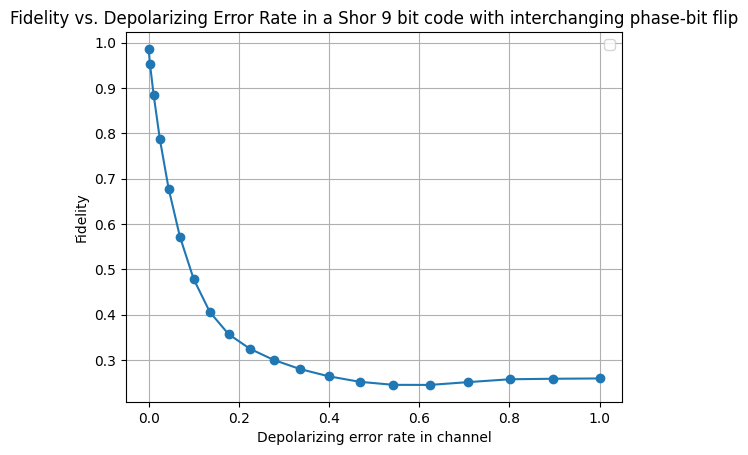

In [6]:
# Plot the fidelity graph
plot(noise_prob, gaussian_filter1d(fidelities, sigma=1), marker='o')
xlabel('Depolarizing error rate in channel')
ylabel('Fidelity')
title('Fidelity vs. Depolarizing Error Rate in a Shor 9 bit code with interchanging phase-bit flip')
grid()
legend()

In [ ]:
shor9.draw(output='mpl').savefig("/kaggle/working/Shor9 with interchanging bit and phase flip.png",dpi=400,bbox_inches="tight")